In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length)])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

# Load the data
data = pd.read_csv('stock_data.csv', header=[0], index_col=0)

# Flatten the multi-index
data.columns = [' '.join(col).strip() for col in data.columns.values]

# Normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)

# Create sequences
sequence_length = 60  # Use 60 days of historical data to predict the next day
X, y = create_sequences(normalized_data, sequence_length)

# Reshape X to be 3D: (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], X.shape[2]))

# Split the data
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]



In [19]:

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32)

# Testing Model
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)



Epoch 1/5


C:\Users\Gustavo Castro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0053
Epoch 2/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 2.4836e-04
Epoch 3/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 1.8175e-04
Epoch 4/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 1.8427e-04
Epoch 5/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 1.3262e-04
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step


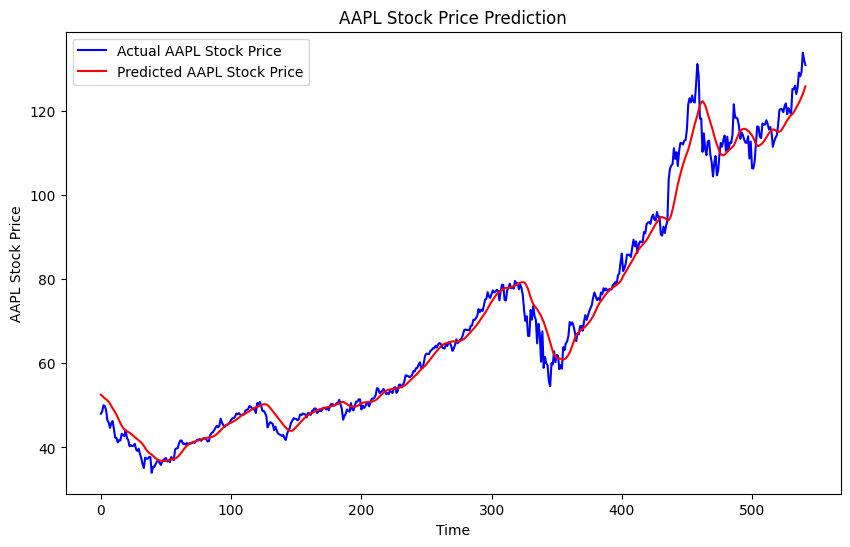

In [21]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='Actual AAPL Stock Price')
plt.plot(predictions , color='red', label='Predicted AAPL Stock Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AAPL Stock Price')
plt.legend()
plt.show()